## About this file and all files relate to my undergraduate senior research project

This is "K-means Clustering .ipynb", which is the code of k-means clustering I used in the undergraduate senior reseach project, "Galaxy Morphology Classification via Machine Learning."

Summary of the files relate to the senior research project, "Galaxy Morphology Classification via Machine Learning"
# 1. Data
・Galaxy Zoo --> "gz.csv"\
・SDSS DR7 --> "result.csv", "result (1).csv", "result (2).csv", "result (3).csv", "result (4).csv", "result (5).csv"
# 2. Code
・Data Preparation --> "Data Preparation.ipynb"\
・K-means clustering --> "K-means Clustering .ipynb"\
・SVM --> SVM.ipynb
# 3. Presentation
・Progress report used at colloquium on October 16th, 2019 --> "colloquium.key"
# 4. Paper
・Paper submitted on December 4th, 2019 --> "final paper.pdf"

If you have any questions, please contact me (kanta29.1996@gmail.com).

# 1. Unsupervised Learning (K-means analysis)

In [2]:
import pandas as pd
import numpy as np
from IPython.display import Image
%matplotlib inline

In [3]:
data = pd.read_csv("data_ul.csv") # Reas data file "data_ul.csv"

In [4]:
# Display the number of elliptical and spiral galaxies.
print(len(data[data["class"]=="E"]))
print(len(data[data["class"]=="S"]))

5221
5221


In [5]:
# Display the first 5 rows of the data.
data.head()

,RA,DEC,mCr4_u,mCr4_g,mCr4_r,mCr4_i,mCr4_z,modelMag_u,modelMag_g,modelMag_r,...,g-r,r-i,i-z,concentration_u,concentration_g,concentration_r,concentration_i,concentration_z,concentration_avg,class
0,13:37:42.35,+29:42:23.2,2.388309,2.442907,2.418520,2.442698,2.445185,18.260094,16.253170,15.222098,...,1.031072,0.449123,0.369239,0.358247,0.338335,0.331960,0.338311,0.338523,0.341075,E
1,10:54:54.99,+20:24:01.3,2.293340,2.290089,2.336685,2.316640,2.273516,20.037567,18.338934,17.568832,...,0.770102,0.415281,0.280210,0.402463,0.368590,0.358184,0.357092,0.411187,0.379503,E
2,00:06:07.05,-08:56:22.2,2.436670,2.402995,2.366154,2.367218,2.353993,18.577097,16.699816,15.787652,...,0.912164,0.433211,0.333119,0.333803,0.308371,0.316871,0.316200,0.312648,0.317579,E
3,14:32:18.97,+22:02:37.7,2.350999,2.317053,2.336085,2.345575,2.333912,18.869297,16.997458,16.130165,...,0.867293,0.423179,0.324301,0.341872,0.310536,0.300766,0.296157,0.293559,0.308578,E
4,23:28:50.41,-00:18:49.8,2.388864,2.411263,2.410567,2.409791,2.383917,18.864117,17.106249,16.085445,...,1.020804,0.465537,0.353242,0.450988,0.359541,0.345536,0.339456,0.334796,0.366063,E


# K-means analysis "u-g" VS "g-r"

In [6]:
# Display the mean vlaues of the coulor index of each class so that contained data follows theoretical (or experimental) explanation.
print(data.groupby("class")["u-g"].mean())
print(data.groupby("class")["g-r"].mean())
print(data.groupby("class")["r-i"].mean())
print(data.groupby("class")["i-z"].mean())

class
E    1.963695
S    1.564468
Name: u-g, dtype: float64
class
E    1.107239
S    0.802457
Name: g-r, dtype: float64
class
E    0.469319
S    0.421041
Name: r-i, dtype: float64
class
E    0.355675
S    0.302131
Name: i-z, dtype: float64


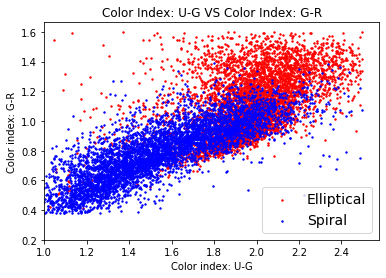

In [7]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Assign the values of "u-g" and "g-r" to "f1" and "f2"
f1 = data["u-g"].values
f2 = data["g-r"].values
X1 = np.array(list(zip(f1, f2)))

# Visualize X1
plt.scatter(f1[data["class"]=="E"], f2[data["class"]=="E"], c="r", s=2, label="Elliptical") # Plot elliptical galaxies with red colors
plt.scatter(f1[data["class"]=="S"], f2[data["class"]=="S"], c="b", s=2, label="Spiral") # Plot spiral galaxies with blue colors
plt.legend(loc="lower right", fontsize=14)
plt.ylim(0.2,)
plt.xlim(1,)
plt.xlabel("Color index: U-G")
plt.ylabel("Color index: G-R")
plt.title("Color Index: U-G VS Color Index: G-R")
plt.savefig('images/u-gVSg-r.png', dpi=300)
plt.show()

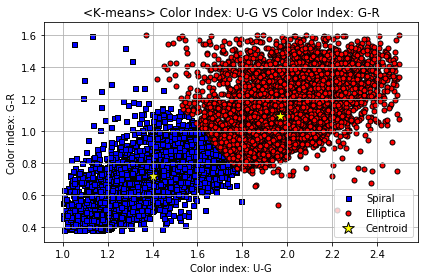

In [8]:
# Run k-means clustering 

# Use a k-means algorithm from Scikit-learn
km1 = KMeans(n_clusters=2, 
            init='k-means++',      #Set the postition of centroids  randomly
            n_init=100,          #Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
            max_iter=300,       #Maximum number of iterations of the k-means algorithm for a single run.
            tol=1e-04,          #Relative tolerance  with regrads toineria to  declare convergence
            random_state=0)

#Assign easch sample to a cluster
y_km1 = km1.fit_predict(X1)        

# Plot classified spiral galaxies with blue colors
plt.scatter(X1[y_km1 == 0, 0], #Choose 0th(x) column of X when y_km (cluseter #) is 0
            X1[y_km1 == 0, 1], #Chose 1th(y) column of X when  y_km is 0
            s=25, c='b',
            marker='s', edgecolor='black')
#Plot classified elliptical galaxies with red colors
plt.scatter(X1[y_km1 == 1, 0], #Choose 0th(x) column of X when y_km (cluseter #) is 1
            X1[y_km1 == 1, 1], #Choose 1th(y) column of X when y_km (cluseter #) is 1
            s=25, c="r",
            marker='o', edgecolor='black')
# Plot centroids
plt.scatter(km1.cluster_centers_[:, 0],
            km1.cluster_centers_[:, 1],
            s=150, marker='*',
            c='yellow', edgecolor='black',
            label='centroids')

plt.legend(["Spiral","Elliptica","Centroid"])
plt.xlabel("Color index: U-G")
plt.ylabel("Color index: G-R")
plt.title("<K-means> Color Index: U-G VS Color Index: G-R")
plt.grid()
plt.tight_layout()
plt.savefig('images/u-gVSg-r_vis.png', dpi=300)
plt.show()

m = - log2.51 (F/Fvega)
if g-r = -log2.51(Fgree/Fred)=0.8
   Fred/Fgreen=2.51^0.8=2.08
   It indicates that the star emits 2.08 times as much red-      wavelength light as green-wavelength light.
   
Elliptical galazies are giving off more red light because they consist of old stars. Therefore the cluster which has higher value of "u-g" and "g-r" is thought as a group of elliptical galaxies (cluster=0). 

[[4848  373]
 [1751 3470]]


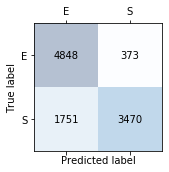

In [29]:
from sklearn.metrics import confusion_matrix as cm

# Adjust the class name 
y_km_adj1 = []
for i in y_km1:
    if i == 0:
        y_km_adj1.append("S")
    else:
        y_km_adj1.append("E")
        
# Create a confusion matrix
labels = ["E", "S"]
labels1 = data["class"].tolist()
pred1 = y_km_adj1
confmat1 = cm(labels1, pred1, labels)
print(confmat1)

# Visualize the confusion matrix
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat1.shape[0]):
    for j in range(confmat1.shape[1]):
        ax.text(x=j, y=i, s=confmat1[i,j], va='center', ha='center')

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.savefig('images/u-gVSg-r_conf.png', dpi=300)
plt.show()

In [30]:
# accuracy_score

from sklearn.metrics import accuracy_score

print("Overall Accuracy")
print((confmat1[0,0]+confmat1[1,1])/np.sum(confmat1)*100)

print("Accuracy of Elliptical Galaxies")
print(confmat1[0,0]/ (confmat1[0,0] + confmat1[0,1])*100)
print("Accuracy of Spiral Galaxies")
print(confmat1[1,1]/ (confmat1[1,0] + confmat1[1,1])*100)

Overall Accuracy
79.65906914384217
Accuracy of Elliptical Galaxies
92.8557747557939
Accuracy of Spiral Galaxies
66.46236353189045


# K-means analysis "concentration_g" VS "concentration_r"

In [31]:
# Display the mean values of each class
print(data.groupby("class")["concentration_u"].mean())
print(data.groupby("class")["concentration_g"].mean())
print(data.groupby("class")["concentration_r"].mean())
print(data.groupby("class")["concentration_i"].mean())
print(data.groupby("class")["concentration_z"].mean())

class
E    0.416622
S    0.460631
Name: concentration_u, dtype: float64
class
E    0.341824
S    0.434789
Name: concentration_g, dtype: float64
class
E    0.330200
S    0.415578
Name: concentration_r, dtype: float64
class
E    0.326272
S    0.408652
Name: concentration_i, dtype: float64
class
E    0.328162
S    0.409853
Name: concentration_z, dtype: float64


According to a research, concentration of a elliptical galaxy is usually less than 0.35, and that of a spiral galaxy is more than 0.35. In other worlds, I assume that I can distinguish E from S by  using concentration parameters. (Smaller values --> elliptical galaxies/ Larger values --> spiral galaxies)

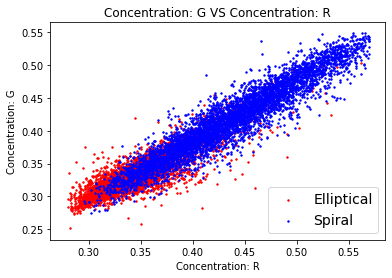

In [32]:
# Assign the values of "concentration_g" and "concentration_r" to "f3" and "f4"
f3 = data["concentration_g"].values
f4 = data["concentration_r"].values
X2 = np.array(list(zip(f3, f4)))

# Visualize X2
plt.scatter(f3[data["class"]=="E"], f4[data["class"]=="E"], c="r", s=2, label="Elliptical") # Plot elliptical galaxies with red colors
plt.scatter(f3[data["class"]=="S"], f4[data["class"]=="S"], c="b", s=2, label="Spiral") # Plot spiral galaxies with blue colors
plt.legend(loc="lower right", fontsize=14)
plt.ylabel("Concentration: G")
plt.xlabel("Concentration: R")
plt.title("Concentration: G VS Concentration: R")
plt.savefig("images/concentration_gr.png", dpi=300)
plt.show()

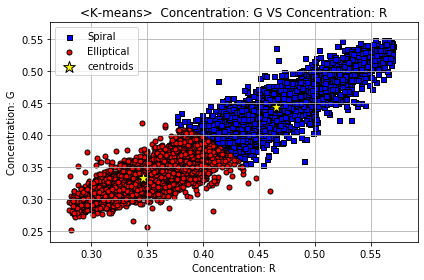

In [33]:
# Use a k-means algorithm from Scikit-learn
km2 = KMeans(n_clusters=2, 
            init='k-means++',      #Set the postition of centroids  randomly
            n_init=100,          #Number of time the k-means algorithm will be run with different centroid  seeds. t
            max_iter=300,       
            tol=1e-04,          #Relative tolerance  with regrads toineria to  declare convergence
            random_state=0)

#Assign easch sample to a cluste
y_km2 = km2.fit_predict(X2)        

# Plot classified spiral galaxies with blue colors
plt.scatter(X2[y_km2 == 0, 0], #Choose 0th(x) column of X when y_km2 (cluseter #) is 0
            X2[y_km2 == 0, 1], #Chose 1th(y) column of X when  y_km2 is 0
            s=25, c='b',
            marker='s', edgecolor='black',
            label='Spiral')
#Plot classified elliptical galaxies with red colors
plt.scatter(X2[y_km2 == 1, 0], #Choose 0th(x) column of X when y_km2 (cluseter #) is 1
            X2[y_km2 == 1, 1], #Choose 1th(y) column of X when y_km2 (cluseter #) is 1
            s=25, c='r',
            marker='o', edgecolor='black',
            label='Elliptical')
#Plot centroids
plt.scatter(km2.cluster_centers_[:, 0],
            km2.cluster_centers_[:, 1],
            s=150, marker='*',
            c='yellow', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
#plt.ylim(0.2, 0.6)
#plt.xlim(0.2, 0.65)
plt.ylabel("Concentration: G")
plt.xlabel("Concentration: R")
plt.title("<K-means>  Concentration: G VS Concentration: R")
plt.grid()
plt.tight_layout()
plt.savefig('images/concentration_gr_vis.png', dpi=300)
plt.show()

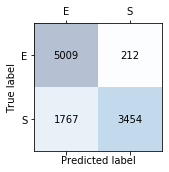

In [34]:
from sklearn.metrics import confusion_matrix as cm

# Adjust the class name
y_km_adj2 = []
for i in y_km2:
    if i == 0:
        y_km_adj2.append("S")
    else:
        y_km_adj2.append("E")
    
# Create a confusion matrix
label2 = data["class"]
pred2 = y_km_adj2
confmat2 = cm(label2, pred2)

# Visualize the confusion matrix
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat2, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat2.shape[0]):
    for j in range(confmat2.shape[1]):
        ax.text(x=j, y=i, s=confmat2[i, j], va='center', ha='center')

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('images/concentration_gr_conf.png', dpi=300)
plt.show()

In [35]:
# accuracy_score
print("Overall Accuracy")
print((confmat2[0,0]+confmat2[1,1])/np.sum(confmat2)*100)
#print(accuracy_score(labels, pred)*100)

print("Accuracy of Elliptical Galaxies")
print(confmat2[0,0]/ (confmat2[0,0] + confmat2[0,1])*100)
print("Accuracy of Spiral Galaxies")
print(confmat2[1,1]/ (confmat2[1,0] + confmat2[1,1])*100)

Overall Accuracy
81.04769201302432
Accuracy of Elliptical Galaxies
95.93947519632255
Accuracy of Spiral Galaxies
66.1559088297261


I will not provide the detail explanation for the following combinations of parameters since the processes are all same. 

# K-means clustering "u-g VS concentration_r"

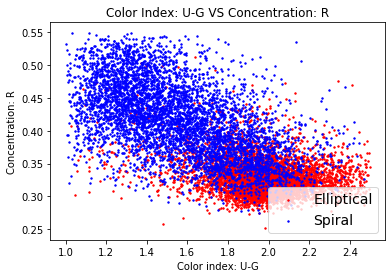

In [36]:
X3 = np.array(list(zip(f1, f4)))

# Plotting X
plt.scatter(f1[data["class"]=="E"], f4[data["class"]=="E"], c="r", s=2, label="Elliptical")
plt.scatter(f1[data["class"]=="S"], f4[data["class"]=="S"], c="b", s=2, label="Spiral")
plt.legend(loc="lower right", fontsize=14)
plt.xlabel("Color index: U-G")
plt.ylabel("Concentration: R")
plt.title("Color Index: U-G VS Concentration: R")
plt.savefig("images/u-gVScon_r.png", dpi=300)
plt.show()

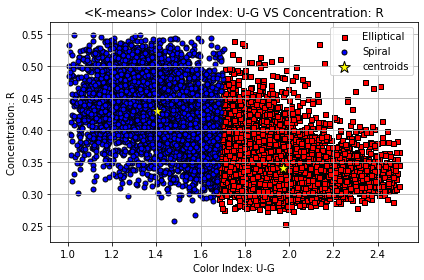

In [39]:
km3 = KMeans(n_clusters=2, 
            init='k-means++',      #Set the postition of centroids  randomly
            n_init=100,          #Number of time the k-means algorithm will be run with different centroid seeds. t
            max_iter=300,       
            tol=1e-04,          #Relative tolerance  with regrads toineria to  declare convergence
            random_state=0)

y_km3 = km3.fit_predict(X3)        #Assign easch sample to a cluster

plt.scatter(X3[y_km3 == 0, 0], #Choose 0th(x) column of X when y_km (cluseter #) is 0
            X3[y_km3 == 0, 1], #Chose 1th(y) column of X when  y_km is 0
            s=25, c='r',
            marker='s', edgecolor='black',
            label='Elliptical')
plt.scatter(X3[y_km3 == 1, 0], #Choose 0th(x) column of X when y_km (cluseter #) is 1
            X3[y_km3 == 1, 1], #Choose 1th(y) column of X when y_km (cluseter #) is 1
            s=25, c='b',
            marker='o', edgecolor='black',
            label='Spiral')
plt.scatter(km3.cluster_centers_[:, 0],
            km3.cluster_centers_[:, 1],
            s=150, marker='*',
            c='yellow', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
#plt.xlim(0, 3.5)
plt.xlabel("Color Index: U-G")
plt.ylabel("Concentration: R")
plt.title("<K-means> Color Index: U-G VS Concentration: R")
plt.grid()
plt.tight_layout()
plt.savefig('images/u-gVScon_r_vis.png', dpi=300)
plt.show()

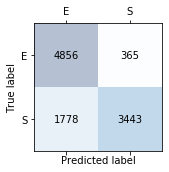

In [40]:
# Create Confusion matrix
y_km_adj3 = []
for i in y_km3:
    if i == 0:
        y_km_adj3.append("E")
    else:
        y_km_adj3.append("S")

label3 = data["class"]
pred3 = y_km_adj3
confmat3 = cm(label3, pred3)

# Visualize the confusion matrix
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat3, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat3.shape[0]):
    for j in range(confmat3.shape[1]):
        ax.text(x=j, y=i, s=confmat3[i, j], va='center', ha='center')

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.savefig('images/u-gVScon_r_conf.png', dpi=300)
plt.show()

In [41]:
print("Overall Accuracy")
print((confmat3[0,0]+confmat3[1,1])/np.sum(confmat3)*100)
#print(accuracy_score(labels, pred)*100)

print("Accuracy of Elliptical Galaxies")
print(confmat3[0,0]/ (confmat3[0,0] + confmat3[0,1])*100)
print("Accuracy of Spiral Galaxies")
print(confmat3[1,1]/ (confmat3[1,0] + confmat3[1,1])*100)

Overall Accuracy
79.4771116644321
Accuracy of Elliptical Galaxies
93.00900210687608
Accuracy of Spiral Galaxies
65.94522122198812


# K-means clustering "g-r" VS "concentration_r"

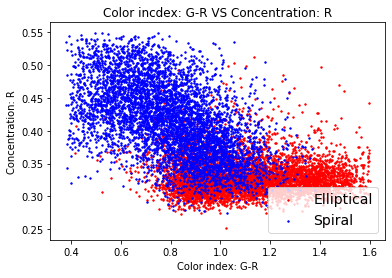

In [42]:
X4 = np.array(list(zip(f2, f4)))

# Plotting X
plt.scatter(f2[data["class"]=="E"], f4[data["class"]=="E"], c="r", s=2, label="Elliptical")
plt.scatter(f2[data["class"]=="S"], f4[data["class"]=="S"], c="b", s=2, label="Spiral")
plt.legend(loc="lower right", fontsize=14)
plt.xlabel("Color index: G-R")
plt.ylabel("Concentration: R")
plt.title("Color incdex: G-R VS Concentration: R")
plt.savefig("images/g-rVScon_r.png", dpi=300)
plt.show()

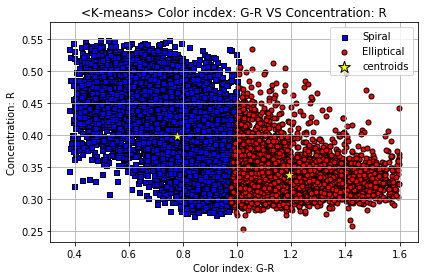

In [43]:
km4 = KMeans(n_clusters=2, 
            init='k-means++',      #Set the postition of centroids  randomly
            n_init=100,          #Number of time the k-means algorithm will be run with different centroid  seeds. t
            max_iter=300,       
            tol=1e-04,          #Relative tolerance  with regrads toineria to  declare convergence
            random_state=0)

y_km4 = km4.fit_predict(X4)        #Assign easch sample to a cluster

plt.scatter(X4[y_km4 == 0, 0], #Choose 0th(x) column of X when y_km (cluseter #) is 0
            X4[y_km4 == 0, 1], #Chose 1th(y) column of X when  y_km is 0
            s=25, c='b',
            marker='s', edgecolor='black',
            label='Spiral')
plt.scatter(X4[y_km4 == 1, 0], #Choose 0th(x) column of X when y_km (cluseter #) is 1
            X4[y_km4 == 1, 1], #Choose 1th(y) column of X when y_km (cluseter #) is 1
            s=25, c='r',
            marker='o', edgecolor='black',
            label='Elliptical')
plt.scatter(km4.cluster_centers_[:, 0],
            km4.cluster_centers_[:, 1],
            s=150, marker='*',
            c='yellow', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
#plt.xlim(0, 2.3)
plt.xlabel("Color index: G-R")
plt.ylabel("Concentration: R")
plt.title("<K-means> Color incdex: G-R VS Concentration: R")
plt.grid()
plt.tight_layout()
plt.savefig('imagesg-rVScon_r_vis.png', dpi=300)
plt.show()

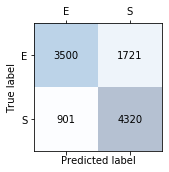

In [44]:
y_km_adj4 = []
for i in y_km4:
    if i == 0:
        y_km_adj4.append("S")
    else:
        y_km_adj4.append("E")
    
# Create Confusion matrix
label4 = data["class"]
pred4 = y_km_adj4
confmat4 = cm(label4, pred4)

# Visualize the confusion matrix
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat4, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat4.shape[0]):
    for j in range(confmat4.shape[1]):
        ax.text(x=j, y=i, s=confmat4[i, j], va='center', ha='center')

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('images/g-rVScon_r_conf.png', dpi=300)
plt.show()

In [45]:
print("Overall Accuracy")
print((confmat4[0,0]+confmat4[1,1])/np.sum(confmat4)*100)
#print(accuracy_score(labels, pred)*100)

print("Accuracy of Elliptical Galaxies")
print(confmat4[0,0]/ (confmat4[0,0] + confmat4[0,1])*100)
print("Accuracy of Spiral Galaxies")
print(confmat4[1,1]/ (confmat4[1,0] + confmat4[1,1])*100)

Overall Accuracy
74.8898678414097
Accuracy of Elliptical Galaxies
67.03696609844857
Accuracy of Spiral Galaxies
82.74276958437082


# K-means clustering "g-r" VS "concentration_g"

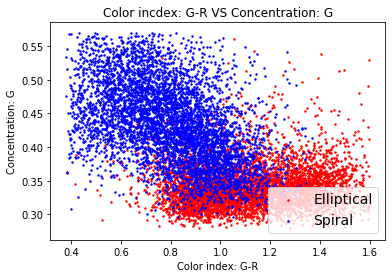

In [46]:
X5 = np.array(list(zip(f2, f3)))

# Plotting X
plt.scatter(f2[data["class"]=="E"], f3[data["class"]=="E"], c="r", s=2, label="Elliptical")
plt.scatter(f2[data["class"]=="S"], f3[data["class"]=="S"], c="b", s=2, label="Spiral")
plt.legend(loc="lower right", fontsize=14)
plt.xlabel("Color index: G-R")
plt.ylabel("Concentration: G")
plt.title("Color incdex: G-R VS Concentration: G")
plt.savefig("images/g-rVScon_g.png", dpi=300)
plt.show()

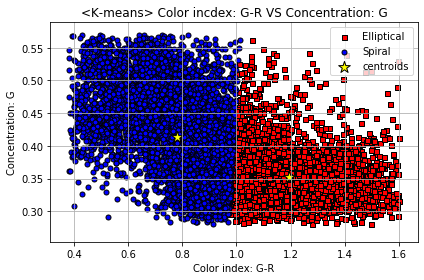

In [49]:
km5 = KMeans(n_clusters=2, 
            init='k-means++',      #Set the postition of centroids  randomly
            n_init=100,          #Number of time the k-means algorithm will be run with different centroid  seeds. t
            max_iter=300,       
            tol=1e-04,          #Relative tolerance  with regrads toineria to  declare convergence
            random_state=0)

y_km5 = km5.fit_predict(X5)        #Assign easch sample to a cluster

plt.scatter(X5[y_km5 == 0, 0], #Choose 0th(x) column of X when y_km (cluseter #) is 0
            X5[y_km5 == 0, 1], #Chose 1th(y) column of X when  y_km is 0
            s=25, c='r',
            marker='s', edgecolor='black',
            label='Elliptical')
plt.scatter(X5[y_km5 == 1, 0], #Choose 0th(x) column of X when y_km (cluseter #) is 1
            X5[y_km5 == 1, 1], #Choose 1th(y) column of X when y_km (cluseter #) is 1
            s=25, c='b',
            marker='o', edgecolor='black',
            label='Spiral')
plt.scatter(km5.cluster_centers_[:, 0],
            km5.cluster_centers_[:, 1],
            s=150, marker='*',
            c='yellow', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.xlabel("Color index: G-R")
plt.ylabel("Concentration: G")
plt.title("<K-means> Color incdex: G-R VS Concentration: G")
plt.grid()
plt.tight_layout()
plt.savefig('images/g-rVScon_g_vis.png', dpi=300)
plt.show()

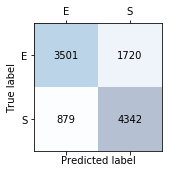

In [50]:
y_km_adj5 = []
for i in y_km5:
    if i == 0:
        y_km_adj5.append("E")
    else:
        y_km_adj5.append("S")
    
# Create Confusion matrix
label5 = data["class"]
pred5 = y_km_adj5
confmat5 = cm(label5, pred5)

# Visualize the confusion matrix
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat5, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat5.shape[0]):
    for j in range(confmat5.shape[1]):
        ax.text(x=j, y=i, s=confmat5[i, j], va='center', ha='center')

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('images/g-rVScon_g_conf.png', dpi=300)
plt.show()

In [51]:
print("Overall Accuracy")
print((confmat5[0,0]+confmat5[1,1])/np.sum(confmat5)*100)
#print(accuracy_score(labels, pred)*100)

print("Accuracy of Elliptical Galaxies")
print(confmat5[0,0]/ (confmat5[0,0] + confmat5[0,1])*100)
print("Accuracy of Spiral Galaxies")
print(confmat5[1,1]/ (confmat5[1,0] + confmat5[1,1])*100)

Overall Accuracy
75.1101321585903
Accuracy of Elliptical Galaxies
67.05611951733384
Accuracy of Spiral Galaxies
83.16414479984677


# 3D k-means analysis with "g-r", "concentration_g", and "concnentration_r."

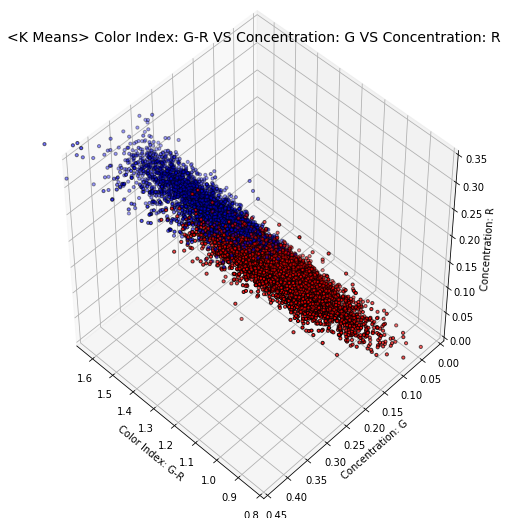

In [53]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

X6 = np.array(list(zip(f2,f3,f4)))
#KMeans
km6 = KMeans(n_clusters=2, 
            init='k-means++',      #Set the postition of centroids  randomly
            n_init=100,          #Number of time the k-means algorithm will be run with different centroid  seeds. t
            max_iter=300,       
            tol=1e-04,          #Relative tolerance  with regrads toineria to  declare convergence
            random_state=0)
y_km6 = km6.fit_predict(X6)

colors = []
for i in y_km6:
    if i==0:
        colors.append("b")
    else:
        colors.append("r")

#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X6[:,0],X6[:,1],X6[:, 2],
          c=colors, edgecolor="k", s=10)
plt.xlim(0.8, )
plt.ylim(0, 0.45)
ax.set_zlim(0, 0.35)
ax.set_xlabel("Color Index: G-R")
ax.set_ylabel("Concentration: G")
ax.set_zlabel("Concentration: R")
plt.title("<K Means> Color Index: G-R VS Concentration: G VS Concentration: R", fontsize=14)
plt.savefig('images/g-rVScon_gVScon_r_vis.png', dpi=300)

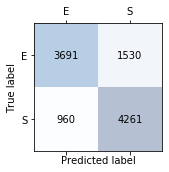

In [57]:
y_km_adj6 = []
for i in y_km6:
    if i == 0:
        y_km_adj6.append("E")
    else:
        y_km_adj6.append("S")
    
# Create Confusion matrix
label6 = data["class"]
pred6 = y_km_adj6
confmat6 = cm(label6, pred6)

# Visualize the confusion matrix
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat6, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat6.shape[0]):
    for j in range(confmat6.shape[1]):
        ax.text(x=j, y=i, s=confmat6[i, j], va='center', ha='center')

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('images/g-rVScon_gVScon_r_conf.png', dpi=300)
plt.show()

In [58]:
print("Overall Accuracy")
print((confmat6[0,0]+confmat6[1,1])/np.sum(confmat6)*100)
#print(accuracy_score(labels, pred)*100)

print("Accuracy of Elliptical Galaxies")
print(confmat6[0,0]/ (confmat6[0,0] + confmat6[0,1])*100)
print("Accuracy of Spiral Galaxies")
print(confmat6[1,1]/ (confmat6[1,0] + confmat6[1,1])*100)

Overall Accuracy
76.15399348783758
Accuracy of Elliptical Galaxies
70.69526910553535
Accuracy of Spiral Galaxies
81.61271787013982


# Color index of g-r VS Average Concentration

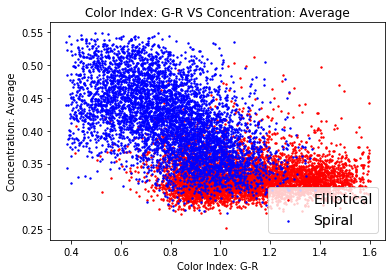

In [59]:
f5 = data["concentration_avg"]
X7 = np.array(list(zip(f2, f5)))

# Plotting X
plt.scatter(f2[data["class"]=="E"], f4[data["class"]=="E"], c="r", s=2, label="Elliptical")
plt.scatter(f2[data["class"]=="S"], f4[data["class"]=="S"], c="b", s=2, label="Spiral")
plt.legend(loc="lower right", fontsize=14)
plt.xlabel("Color Index: G-R")
plt.ylabel("Concentration: Average")
plt.title("Color Index: G-R VS Concentration: Average")
plt.savefig("images/g-rVScon_avg.png", dpi=300)
plt.show()

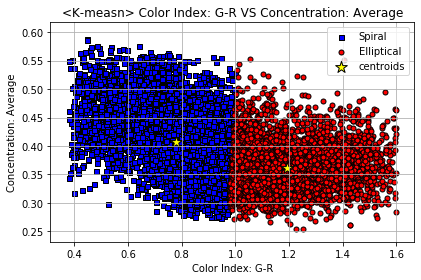

In [60]:
km7 = KMeans(n_clusters=2, 
            init='k-means++',   #Set the initial postition of centroids 
            n_init=100,          #Number of time the k-means algorithm will be run with different centroid  seeds. t
            max_iter=300,       
            tol=1e-04,          #Relative tolerance  with regrads toineria to  declare convergence
            random_state=0)

y_km7 = km7.fit_predict(X7)        #Assign easch sample to a cluster

plt.scatter(X7[y_km7 == 0, 0], #Choose 0th(x) column of X when y_km (cluseter #) is 0
            X7[y_km7 == 0, 1], #Chose 1th(y) column of X when  y_km is 0
            s=25, c='b',
            marker='s', edgecolor='black',
            label='Spiral')
plt.scatter(X7[y_km7 == 1, 0], #Choose 0th(x) column of X when y_km (cluseter #) is 1
            X7[y_km7 == 1, 1], #Choose 1th(y) column of X when y_km (cluseter #) is 1
            s=25, c='r',
            marker='o', edgecolor='black',
            label='Elliptical')
plt.scatter(km7.cluster_centers_[:, 0],
            km7.cluster_centers_[:, 1],
            s=150, marker='*',
            c='yellow', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.xlabel("Color Index: G-R")
plt.ylabel("Concentration: Average")
plt.title("<K-measn> Color Index: G-R VS Concentration: Average")
plt.grid()
plt.tight_layout()
plt.savefig('images/g-rVScon_avg_vis.png', dpi=300)
plt.show()

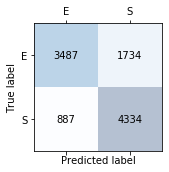

In [61]:
y_km_adj7 = []
for i in y_km7:
    if i == 0:
        y_km_adj7.append("S")
    else:
        y_km_adj7.append("E")
    
# Create Confusion matrix
label7 = data["class"]
pred7 = y_km_adj7
confmat7 = cm(label7, pred7)

# Visualize the confusion matrix
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat7, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat7.shape[0]):
    for j in range(confmat7.shape[1]):
        ax.text(x=j, y=i, s=confmat7[i, j], va='center', ha='center')

ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.savefig('images/g-rVScon_avg_conf.png', dpi=300)
plt.show()

In [62]:
print("Overall Accuracy")
print((confmat7[0,0]+confmat7[1,1])/np.sum(confmat7)*100)
#print(accuracy_score(labels, pred)*100)

print("Accuracy of Elliptical Galaxies")
print(confmat7[0,0]/ (confmat7[0,0] + confmat7[0,1])*100)
print("Accuracy of Spiral Galaxies")
print(confmat7[1,1]/ (confmat7[1,0] + confmat7[1,1])*100)

Overall Accuracy
74.89944455085232
Accuracy of Elliptical Galaxies
66.78797165294004
Accuracy of Spiral Galaxies
83.01091744876462
